<a href="https://colab.research.google.com/github/lcbjrrr/quantai/blob/main/A2_Py_Proc_Stat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descriptive Stats


The auto insurance dataset provides information about U.S. states, including insurance premiums for 2021–2023, population data, geographic coordinates (latitude and longitude), and regional categorizations. It enables analysis of premium trends, comparisons across regions, and relationships between premiums, population, and geography.

In [ ]:
import pandas as pd
auto = pd.read_csv("https://raw.githubusercontent.com/lcbjrrr/quantai/refs/heads/main/autoinsurance.csv")
auto.head(2)

,us_state,state,capital,pricelevel,Y2021,Y2022,Y2023,pop,lat,lon,Region,Division
0,MI,Michigan,Lansing,E,5740,4386,2352,"10,077,331",42.733635,-84.555328,Midwest,East North Central
1,RI,Rhode Island,Providence,E,1375,1197,1200,"1,097,379",41.830914,-71.414963,Northeast,New England


To calculate basic statistics on a DataFrame column, you can use the following functions:

- **Mean**: `auto['Y2023'].mean()` — calculates the average of the "Y2023" column.
- **Median**: `auto['Y2023'].median()` — finds the middle value in the "Y2023" column.
- **Standard Deviation**: `auto['Y2023'].std()` — measures the spread of "Y2023" values from the mean.
- **Variance**: `auto['Y2023'].var()` — calculates the squared spread of "Y2023" values from the mean.

These functions give you a basic understanding of the data's central tendency and variability.

In [ ]:
print(auto['Y2023'].mean())
print(auto['Y2023'].median())
print(auto['Y2023'].std())
print(auto['Y2023'].var())

690.0
600.0
324.1972188879693
105103.83673469388



A categorical frequency, like cat_freq = auto['pricelevel'].value_counts(), calculates the frequency of each unique category in the "pricelevel" column. This shows how many records fall into each price level (e.g., "low," "medium," "high"), providing insights into the distribution of data across these categories.

In [ ]:
cat_freq = auto['pricelevel'].value_counts()
cat_freq

,count
pricelevel,
M,22
L,16
E,6
H,6


A histogram as a bar chart of categorical frequency (cat_freq.plot(kind='bar')) visually represents the counts of each category in the "pricelevel" column. Each bar corresponds to a category (e.g., "low," "medium," "high"), and the bar height indicates how often that category appears. This allows for quick comparison of the distribution of data across the categories.

<Axes: xlabel='pricelevel'>

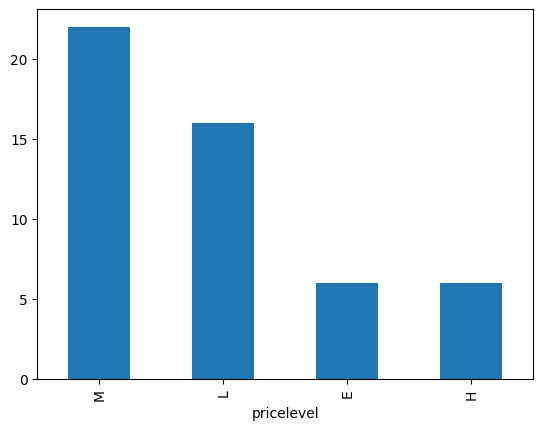

In [ ]:
cat_freq.plot(kind='bar')

Numerical frequency groups continuous numeric data into predefined intervals (bins). In num_freq = pd.value_counts(pd.cut(auto['Y2023'], bins=[0, 500, 800, 1000, 5000], labels=['L', 'M', 'H', 'E'])), the pd.cut() function divides the "Y2023" column into bins labeled 'L', 'M', 'H', and 'E', representing ranges like [0-500), [500-800), etc. The value_counts() function then counts how many values fall into each bin. This method summarizes the data's distribution across specified ranges.

In [ ]:
num_freq = pd.value_counts(pd.cut(auto['Y2023'],bins=[0,500,800,1000,5000],labels=['L','M','H','E']))
num_freq

<ipython-input-23-95e85fcb4278>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  num_freq = pd.value_counts(pd.cut(auto['Y2023'],bins=[0,500,800,1000,5000],labels=['L','M','H','E']))


,count
Y2023,
M,22
L,16
H,6
E,6


A histogram for numerical frequency, represented as a bar chart (num_freq.plot(kind='bar')), shows the count of values within specified numeric ranges (bins). Each bar corresponds to a range (e.g., L, M, H, E), and its height indicates the number of values in that range. This makes it easy to visualize the distribution of numerical data.

<Axes: xlabel='Y2023'>

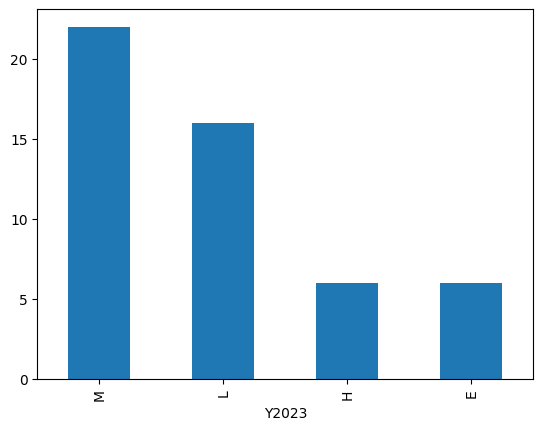

In [ ]:
num_freq.plot(kind='bar')

Using sns.distplot(auto['Y2023'], bins=[0,500,800,1000,5000], kde=False) with Seaborn creates a histogram to visualize the distribution of "Y2023" values. The bins parameter defines intervals for grouping data, and kde=False disables the kernel density estimate, leaving only the bar chart. This provides a quick and visually appealing way to analyze numerical data distributions.

<ipython-input-5-3d0bd1fcbe4e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(auto['Y2023'], bins=[0,500,800,1000,5000],kde=False)


<Axes: xlabel='Y2023'>

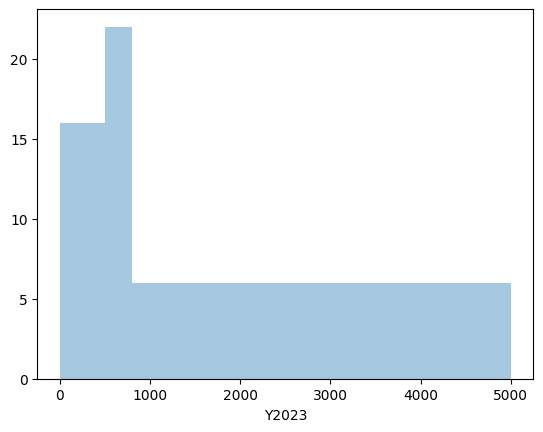

In [ ]:
import seaborn as sns
sns.distplot(auto['Y2023'], bins=[0,500,800,1000,5000],kde=False)

<Axes: ylabel='Frequency'>

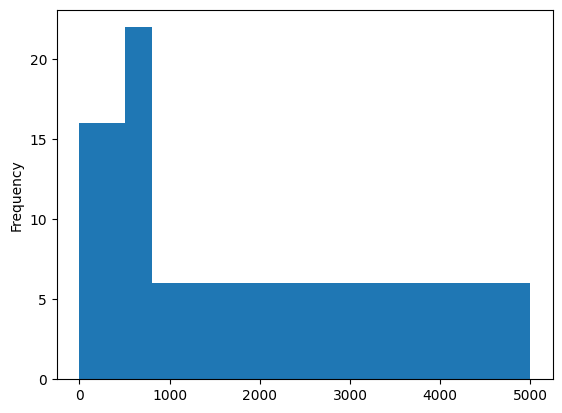

In [ ]:
import matplotlib.pyplot as plt
auto['Y2023'].plot(kind='hist',bins=[0,500,800,1000,5000])


Quartiles divide a dataset into four equal parts to summarize its distribution. When using auto['Y2023'].describe(), you get key statistics, including the first quartile (25%, Q1), which marks the value below which 25% of data falls, the median (50%, Q2), which is the midpoint of the data, and the third quartile (75%, Q3), below which 75% of data falls. These quartiles help analyze the spread, center, and variability of the "Y2023" insurance premiums.

In [ ]:
auto['Y2023'].describe()

,Y2023
count,50.000000
mean,690.000000
std,324.197219
min,336.000000
25%,483.000000
50%,600.000000
75%,786.000000
max,2352.000000


A boxplot, created with sns.boxplot(auto['Y2023']), is a visual tool to summarize the distribution of a dataset. It displays key statistics such as the median (central line), quartiles (edges of the box), and potential outliers (individual points outside whiskers). The whiskers extend to the smallest and largest values within 1.5 times the interquartile range (IQR). This helps identify data spread, skewness, and anomalies in the "Y2023" insurance premiums.

<Axes: ylabel='Y2023'>

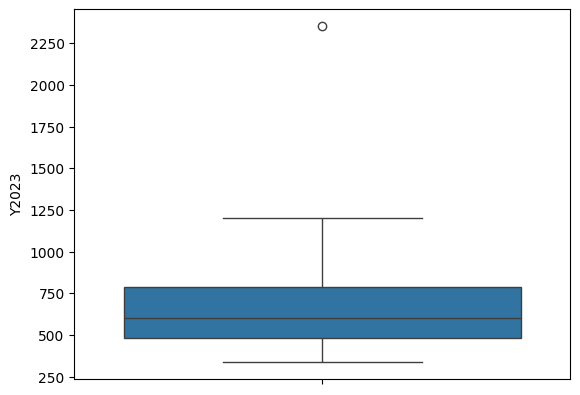

In [ ]:
import seaborn as sns
sns.boxplot(auto['Y2023'])

<Axes: >

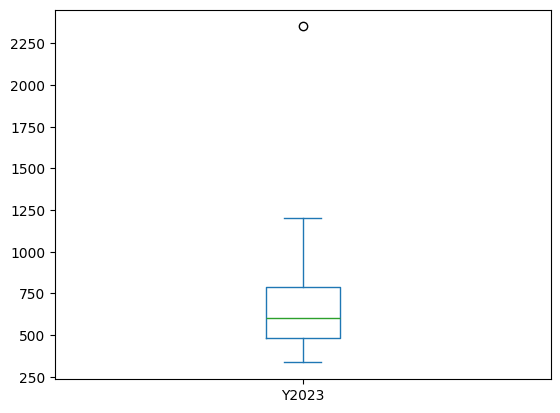

In [ ]:
auto['Y2023'].plot(kind='box')


To break down a boxplot by categorical values, sns.boxplot(data=auto, x='Y2023', y='Region') creates a horizontal boxplot for "Y2023" premiums grouped by the "Region" categories. Each region has its own box, allowing comparison of the distribution of premiums (e.g., median, quartiles, and outliers) across regions. This helps visualize differences in data spread and central tendencies among categories.

<Axes: xlabel='Y2023', ylabel='Region'>

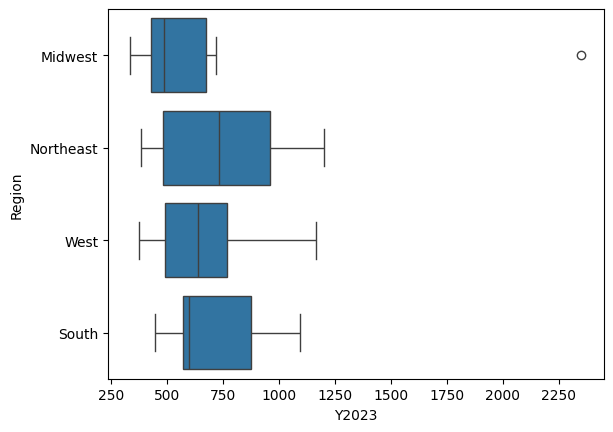

In [ ]:
sns.boxplot(data=auto,x='Y2023',y='Region')